/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


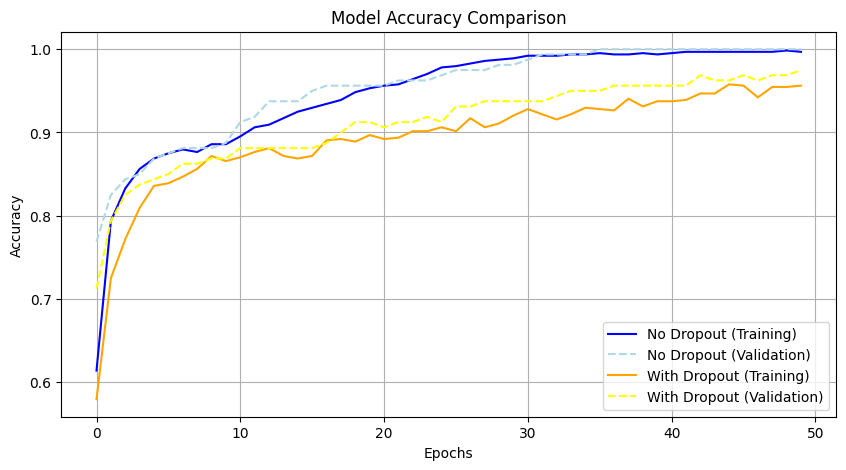

In [1]:
#Dropout
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Create a synthetic dataset
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model without dropout
model_no_dropout = Sequential()
model_no_dropout.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_no_dropout.add(Dense(32, activation='relu'))
model_no_dropout.add(Dense(1, activation='sigmoid'))
model_no_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_no_dropout = model_no_dropout.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Train model with dropout
model_with_dropout = Sequential()
model_with_dropout.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_with_dropout.add(Dropout(0.5))  # Apply dropout
model_with_dropout.add(Dense(32, activation='relu'))
model_with_dropout.add(Dropout(0.5))  # Apply dropout again
model_with_dropout.add(Dense(1, activation='sigmoid'))
model_with_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_with_dropout = model_with_dropout.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Plotting the accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_no_dropout.history['accuracy'], label='No Dropout (Training)', color='blue')
plt.plot(history_no_dropout.history['val_accuracy'], label='No Dropout (Validation)', color='lightblue', linestyle='dashed')
plt.plot(history_with_dropout.history['accuracy'], label='With Dropout (Training)', color='orange')
plt.plot(history_with_dropout.history['val_accuracy'], label='With Dropout (Validation)', color='yellow', linestyle='dashed')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()